
# Project : Investigate a Dataset ( TMDB Movie Database )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.●Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|)characters.●There are some odd charactersin the ‘cast’ column. Don’t worryabout cleaning them. You canleave them as is.●The final two columns endingwith “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime.

In [189]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [288]:
tmdb = pd.read_csv('tmdb-movies.csv')

In [289]:
tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [290]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [291]:
#rows with missing data
tmdb.isnull().any(axis = 1).sum()

8874

In [292]:
# Drop rows with missing data 
tmdb.dropna(inplace=True)

In [293]:
#r check agian 
tmdb.isnull().any(axis = 1).sum()

0

In [294]:
#duplicate rows
sum(tmdb.duplicated())

0

In [295]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

## Which genres aremost popular fromyear to year? 1-fix genres format :

In [296]:
type(tmdb.genres[0])

str

In [297]:
tmdb.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10724                    Adventure|Action|Thriller
10759                              Horror|Thriller
10760                                       Comedy
10817                            Documentary|Music
10819                                Action|Comedy
Name: genres, Length: 1992, dtype: object

In [300]:
# I replaced | to space to make it easy when fillter Genres.
tmdb.genres = tmdb.genres.str.replace("|"," ") 

In [301]:
tmdb.genres 

0        Action Adventure Science Fiction Thriller
1        Action Adventure Science Fiction Thriller
2               Adventure Science Fiction Thriller
3         Action Adventure Science Fiction Fantasy
4                            Action Crime Thriller
                           ...                    
10724                    Adventure Action Thriller
10759                              Horror Thriller
10760                                       Comedy
10817                            Documentary Music
10819                                Action Comedy
Name: genres, Length: 1992, dtype: object

# I serarch about How to counts each genres , here is the Reference
[Reference](https://stackoverflow.com/questions/38557617/how-to-get-all-the-unique-words-in-the-data-frame )


In [273]:
countGen = tmdb['genres'].str.split(' ', expand=True).stack().value_counts() 
countGen

Drama          838
Comedy         640
Thriller       575
Action         532
Adventure      361
Romance        291
Science        291
Fiction        291
Horror         273
Crime          262
Family         233
Fantasy        202
Animation      170
Mystery        148
Documentary     93
Music           72
History         56
War             44
Western         20
TV              16
Movie           16
Foreign          6
dtype: int64

In [278]:
# I will drop TV and Moive form countGen
countGen.drop(labels=['TV', 'Movie'] , inplace = True)

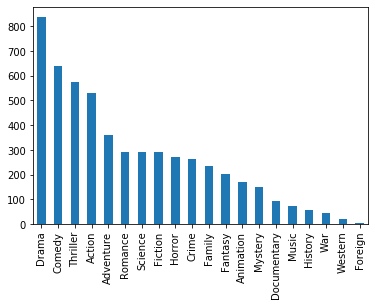

In [279]:
countGen.plot.bar();

## Action moives  

In [304]:
# check which are the Action moives  
tmdb_Action= tmdb[tmdb['genres'].str.contains('Action') == True ]


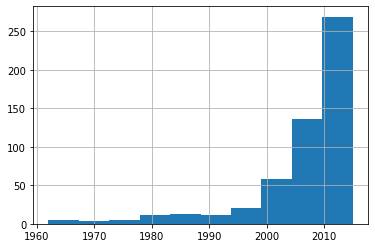

In [313]:
# which yeras were produced  more of this type 
tmdb_Action['release_year'].hist();

 ## Adventure moives 

In [317]:
# check which are the Adventure moives  
tmdb_Adventure= tmdb[tmdb['genres'].str.contains('Adventure') == True ]

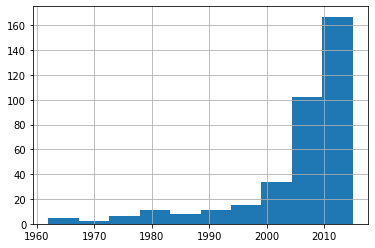

In [319]:
# which yeras were produced  more of this type 
tmdb_Adventure['release_year'].hist();

## Science Fiction 

In [225]:
# check which are the Science Fiction moives  
tmdb_sc_fi= tmdb[tmdb['genres'].str.contains('Science Fiction') == True ]

In [176]:
# we can see that there are 1230 Science Fiction moives
tmdb_sc_fi.shape

(1230, 21)

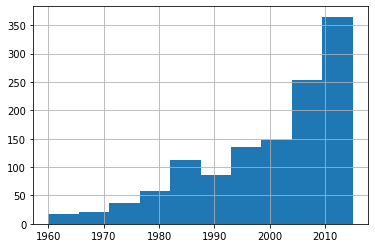

In [226]:
# which yeras were produced  more of this type 
tmdb_sc_fi['release_year'].hist();

 ## Thriller moives  

In [227]:
# check which are the Thriller moives  
tmdb_Thriller= tmdb[tmdb['genres'].str.contains('Thriller') == True ]

In [228]:
tmdb_Thriller.shape

(2908, 21)

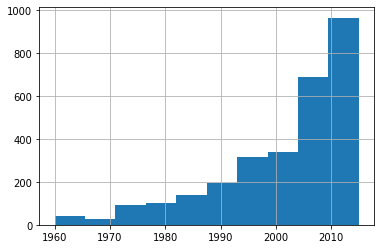

In [219]:
# which yeras were produced  more of this type 
tmdb_Thriller['release_year'].hist();

In [ ]:
# check which are the Adventure moives  
tmdb_Thriller= tmdb[tmdb['genres'].str.contains('Thriller') == True ]
tmdb_Thriller.head(2)